# Preliminary Exploratory Data Analysis sample code

by Ega Kurnia Yazid

## Data Setup - Preparation

In [2]:
# Importing libraries and dependencies
from datetime import timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("white")
%matplotlib inline

In [3]:
# Importing data
# Note: Make sure the file is in the same folder as the notebook
df = pd.read_csv('NH_Technical_Test.csv') # Import your dataset here

### Preliminary data check

In [4]:
df.head() # Check top five data

,client_id,invoice_id,invoice_item_id,invoice_status,service_status,product_id,monthly_price_usd,discount,service_period,client_task,invoice_created_at,invoice_paid_at,service_cancelled_at,monthly_period,total_price,discounted_price
0,9162,872143.0,1115707,Paid,Active,4,18,0.42,1Y,Renew,2019-12-05T22:36:44Z,2019-12-25T12:30:11Z,NaN,12,216,125.28
1,246708,875146.0,841327,Paid,Active,11,39,0.14,1M,Activate,2019-12-09T04:20:49Z,2019-12-09T04:25:11Z,NaN,1,39,33.54
2,52476,856128.0,1197628,Paid,Active,12,49,0.69,1M,Renew,2019-11-20T21:24:37Z,2019-12-03T23:33:27Z,NaN,1,49,15.19
3,129362,869645.0,1004638,Paid,Active,1,6,0.44,1Y,Renew,2019-12-04T00:37:05Z,2019-12-15T13:13:30Z,NaN,12,72,40.32
4,47277,843127.0,1184209,Paid,Active,3,13,0.34,1Y,Renew,2019-11-06T21:24:30Z,2019-12-04T03:37:11Z,NaN,12,156,102.96


In [5]:
df.shape # Check number of rows and columns

(89545, 16)

In [6]:
df.info() # Check the data general info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89545 entries, 0 to 89544
Data columns (total 16 columns):
client_id               89545 non-null int64
invoice_id              89545 non-null float64
invoice_item_id         89545 non-null int64
invoice_status          89545 non-null object
service_status          89545 non-null object
product_id              89545 non-null int64
monthly_price_usd       89545 non-null int64
discount                89545 non-null float64
service_period          89545 non-null object
client_task             89545 non-null object
invoice_created_at      89545 non-null object
invoice_paid_at         53755 non-null object
service_cancelled_at    21756 non-null object
monthly_period          89545 non-null int64
total_price             89545 non-null int64
discounted_price        89545 non-null float64
dtypes: float64(3), int64(6), object(7)
memory usage: 10.9+ MB


In [7]:
df.describe() # Check out the summary statistics for numerical (int and float)

,client_id,invoice_id,invoice_item_id,product_id,monthly_price_usd,discount,monthly_period,total_price,discounted_price
count,89545.000000,89545.000000,8.954500e+04,89545.000000,89545.000000,89545.000000,89545.000000,89545.000000,89545.000000
mean,151297.438684,737033.606176,1.022266e+06,3.727310,15.793512,0.424860,14.413624,201.450444,97.297541
std,67872.812261,85770.813728,1.130957e+05,2.722953,13.015129,1.753377,9.569462,207.633054,311.110162
min,22.000000,583739.000000,8.246620e+05,1.000000,6.000000,0.000000,1.000000,17.000000,-80049.840000
25%,101490.000000,661872.000000,9.251270e+05,2.000000,9.000000,0.310000,12.000000,108.000000,74.000000
50%,155571.000000,737965.000000,1.018091e+06,3.000000,13.000000,0.420000,12.000000,156.000000,78.000000
75%,208243.000000,810130.000000,1.113774e+06,4.000000,17.000000,0.500000,12.000000,216.000000,117.000000
max,260103.000000,882312.000000,1.234070e+06,14.000000,124.000000,514.140000,36.000000,4464.000000,4464.000000


In [8]:
df.describe(include='object') # Summary statistics for categorical (object)

,invoice_status,service_status,service_period,client_task,invoice_created_at,invoice_paid_at,service_cancelled_at
count,89545,89545,89545,89545,89545,53755,21756
unique,4,5,6,2,85060,50163,18759
top,Paid,Active,1Y,Activate,2019-12-06T15:12:14Z,2019-08-30T17:00:00Z,2020-01-12T18:36:18Z
freq,53069,49957,63587,47699,22,39,14


**After checking the basic overview of the data, I'm good to go with the questions**

## Checking out duplicates and missing rows

### 1) Check the duplicated rows

In [9]:
# Checking duplicates
df.duplicated().sum()

0

Apparently, **there is no indication of duplicated rows** in the dataset. While in fact that many duplicates in each column, however, as together in a row, there is no duplicates. Hence, I consider it as no indication of duplicates.

### 2) Check the missing values

In [12]:
df.isna().sum() # Count the number of missing values in each column

client_id                   0
invoice_id                  0
invoice_item_id             0
invoice_status              0
service_status              0
product_id                  0
monthly_price_usd           0
discount                    0
service_period              0
client_task                 0
invoice_created_at          0
invoice_paid_at         35790
service_cancelled_at    67789
monthly_period              0
total_price                 0
discounted_price            0
dtype: int64

According to this result, we can conclude that there is 35,790 missing values in **inovice_paid_at** variable and 67,789 missing values in **service_cancelled_at**. The reasons of why these variables got so many missing values (NaN) are: (1) the 35,790 invoices have been created, but the payments (or further confirmations) haven't been paid yet, so that the data hasn't get recorded yet in the dataset and (2) the rest 67,789 invoice has been created and these have been paid, then they recorded the data on the invoice_paid_at column. In other words, 67,789 records are either it recorded in the paid invoice or it hasn't been recorded yet.

## Total revenue group by product

In [30]:
# consider sales as the invoice status is 'paid'
print('The total revenue is US$',df[df['invoice_status']=='Paid'].discounted_price.sum(),'from',df[df.invoice_status=='Paid'].invoice_id.count(),'sales')

The total revenue is US$ 4974622.63 from 53069 sales


In [51]:
# The total revenue by product
df[df.invoice_status=='Paid'].groupby('product_id').discounted_price.sum().sort_values(ascending=False)

product_id
3     2113157.28
4      908598.60
2      714802.32
1      200150.28
11     198414.84
7      157078.40
12     152207.72
14     147498.22
10      99083.88
9       98756.57
5       73166.64
13      57639.34
6       37486.02
8       16582.52
Name: discounted_price, dtype: float64

## Determining loyal customers

I consider the top 100 loyal customers are whom that have already spent the most compared to other customers.

In [52]:
# top 100 loyal customers
df[df['invoice_status']=='Paid'].groupby('client_id').discounted_price.sum().sort_values(ascending=False).head(100)

client_id
147944    14257.08
16146      7789.44
108912     7708.32
189676     6138.72
167243     5544.00
72630      4754.60
156703     3996.00
216481     3650.40
174555     3545.64
116936     3374.40
112676     3189.84
81141      3105.00
225480     3100.32
116962     3002.52
42628      2915.16
41153      2911.80
106964     2844.00
131891     2838.00
251982     2822.40
195794     2815.56
254024     2773.44
62577      2716.60
80941      2716.32
224887     2689.20
4486       2686.26
128128     2672.88
143719     2657.60
41084      2625.12
162740     2621.40
61818      2548.32
            ...   
163469     1724.64
35736      1717.44
151587     1690.40
132518     1680.00
239649     1660.80
75177      1647.68
32234      1632.12
241280     1630.00
156615     1626.80
61106      1620.00
87989      1602.24
113645     1601.28
61259      1600.56
132218     1597.80
110274     1596.17
59190      1593.52
201208     1586.52
177011     1579.20
134730     1579.20
152597     1579.20
73224      1579.20
73

## Estimate average payment period (using median due to skewed frequency distribution dataset)

In [53]:
# set the invoice date into the date type data instead of object
df['invoice_paid_at'] = pd.to_datetime(df['invoice_paid_at'])
df['invoice_created_at'] = pd.to_datetime(df['invoice_created_at'])

In [54]:
df['invoice_paid_at'].head() # Both data format and result have changed

0   2019-12-25 12:30:11+00:00
1   2019-12-09 04:25:11+00:00
2   2019-12-03 23:33:27+00:00
3   2019-12-15 13:13:30+00:00
4   2019-12-04 03:37:11+00:00
Name: invoice_paid_at, dtype: datetime64[ns, UTC]

In [55]:
df['invoice_created_at'].head() # Both data format and result have changed

0   2019-12-05 22:36:44+00:00
1   2019-12-09 04:20:49+00:00
2   2019-11-20 21:24:37+00:00
3   2019-12-04 00:37:05+00:00
4   2019-11-06 21:24:30+00:00
Name: invoice_created_at, dtype: datetime64[ns, UTC]

In [56]:
# To products that have been paid, calculate the difference between invoice created date and its paid date
df['payment_duration'] = df['invoice_paid_at'] - df['invoice_created_at']

In [57]:
df['payment_duration'].describe()

count                      53755
mean      5 days 10:22:32.283992
std      12 days 01:25:09.286425
min           -17 days +00:00:00
25%              0 days 00:10:56
50%              0 days 06:56:55
75%       9 days 09:00:33.500000
max            343 days 14:30:07
Name: payment_duration, dtype: object

This plot suggests that the data contained the outliers with a very high number and also dominated by a very little number such as zero. Then, to treat this problem, particularly in calculating the average, then **the data would be overestimated from the unecessary outliers** and the average **should be calculated using median**.

In [58]:
# Calculating the average of payment duration within a month treshold
df[df['payment_duration'].dt.days < 32].payment_duration.median()

Timedelta('0 days 05:55:09.500000')

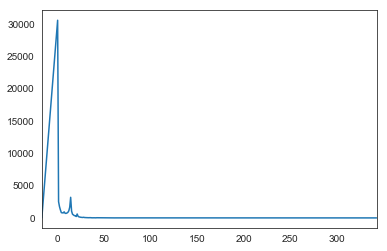

In [59]:
df.payment_duration.dt.days.value_counts().sort_index().plot()

This data clearly states that the average (median) payment duration within a month treshold is around **6 hours**.

In [66]:
# 
outliers = df[df['payment_duration'].dt.days > 31].payment_duration.count()
print('There are only', outliers, 'transactions that get paid more than a month which I consider as the outliers')

There are only 767 transactions that get paid more than a month which I consider as the outliers


## Generating some insights

In [67]:
df.client_task.value_counts()

Activate    47699
Renew       41846
Name: client_task, dtype: int64

In [68]:
pd.crosstab(df.service_status,df.client_task)

client_task,Activate,Renew
service_status,,
Active,28586,21371
Cancelled,2594,19779
Failed Setup,43,1
Pending Setup,15970,20
Suspended,506,675


**Insight 1:** A majority who has cancelled the service, mostly from the renew client.

In [69]:
df.groupby(df.invoice_created_at.dt.month).discounted_price.sum().sort_values(ascending=False)

invoice_created_at
8     838970.26
11    833103.70
9     820600.00
10    817676.23
1     729374.82
7     725619.85
2     716208.94
12    688445.00
3     669544.67
5     657113.35
4     623618.72
6     592232.76
Name: discounted_price, dtype: float64

**Insight 2:** There is an indication that the sales more likely to spike around month 8-11.